In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
df = pd.read_csv('/content/dataset1.csv')
df = df.drop(["Unnamed: 0"], axis=1)

In [0]:
X = df.drop(["y"], axis = 1)
y = df["y"]

In [0]:
for i in range(len(y)):
  if y[i] == 10: y[i]=1

In [5]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5711    1.0
5712    1.0
5713    1.0
5714    1.0
5715    1.0
Name: y, Length: 5716, dtype: float64

In [0]:
X_train, X_a, y_train, y_a = train_test_split(X,y,test_size = 2/12)

In [0]:
X_b,X_test,y_b,y_test = train_test_split(X_a,y_a,test_size = 1/2)

In [0]:
X_train_shaped = np.expand_dims(X_train, axis=2)
X_a = np.expand_dims(X_a, axis=2)
X_test_shaped = np.expand_dims(X_test, axis=2)

In [9]:
X_a.shape

(953, 4, 1)

# CNN Model


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Dropout

In [0]:
model = Sequential()

model.add(Conv1D(64, kernel_size = 3, activation = 'relu', input_shape = (4,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation = 'sigmoid'))

In [0]:
optimizer = Adam(lr=0.00001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [21]:
history = model.fit(X_train_shaped, y_train, validation_data = (X_a,y_a), epochs = 200, batch_size= 32)

Epoch 1/200
149/149 [==============================] - 1s 3ms/step - loss: 0.9486 - accuracy: 0.4871 - val_loss: 0.7971 - val_accuracy: 0.4806
Epoch 2/200
149/149 [==============================] - 0s 2ms/step - loss: 0.8770 - accuracy: 0.4814 - val_loss: 0.7778 - val_accuracy: 0.4806
Epoch 3/200
149/149 [==============================] - 0s 2ms/step - loss: 0.8839 - accuracy: 0.4944 - val_loss: 0.7658 - val_accuracy: 0.4806
Epoch 4/200
149/149 [==============================] - 0s 2ms/step - loss: 0.8881 - accuracy: 0.4854 - val_loss: 0.7516 - val_accuracy: 0.4827
Epoch 5/200
149/149 [==============================] - 0s 2ms/step - loss: 0.8350 - accuracy: 0.4974 - val_loss: 0.7402 - val_accuracy: 0.4848
Epoch 6/200
149/149 [==============================] - 0s 2ms/step - loss: 0.8202 - accuracy: 0.5039 - val_loss: 0.7287 - val_accuracy: 0.4911
Epoch 7/200
149/149 [==============================] - 0s 2ms/step - loss: 0.7953 - accuracy: 0.5047 - val_loss: 0.7202 - val_accuracy: 0.4942

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 64)             256       
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
______________________________________________________

In [23]:
X_train_shaped.shape

(4763, 4, 1)

In [24]:
score = model.evaluate(X_test_shaped, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.5470690131187439 / Test accuracy: 0.74842768907547


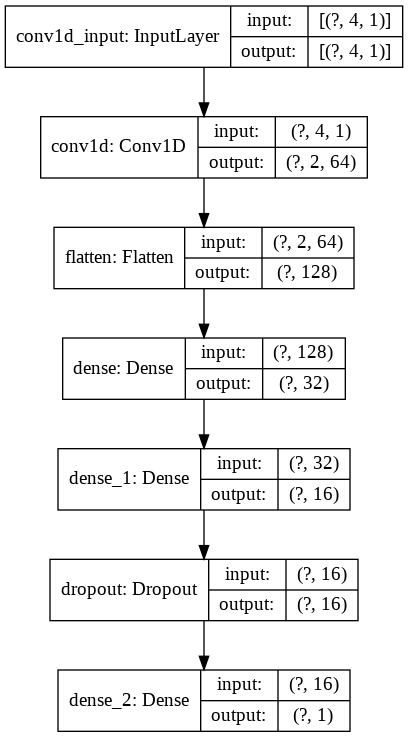

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes= True)

In [27]:
X_b_shaped = np.expand_dims(X_b, axis=2)
count=0
test_pred = model.predict_classes(X_b_shaped)
k1 = np.array(test_pred[:,0])
k2 = np.array(y_b)
for i in range(len(y_b)):
  if k1[i] == k2[i]:
    count = count+1
accuracy = (count*100)/len(y_b)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 64)             256       
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
______________________________________________________

In [0]:
accuracy

In [0]:
import matplotlib.pyplot as plt

In [35]:
history.history

{'accuracy': [0.4870879650115967,
  0.48141926527023315,
  0.4944362938404083,
  0.48540836572647095,
  0.49737560749053955,
  0.5038840770721436,
  0.5047239065170288,
  0.508293092250824,
  0.5045139789581299,
  0.5248792767524719,
  0.5273987054824829,
  0.5238295197486877,
  0.5307579040527344,
  0.5353768467903137,
  0.5536426901817322,
  0.5456644892692566,
  0.5494436025619507,
  0.5660297870635986,
  0.5674994587898254,
  0.5609909892082214,
  0.5840856432914734,
  0.5700188875198364,
  0.5897543430328369,
  0.5740079879760742,
  0.5884946584701538,
  0.5912240147590637,
  0.5859752297401428,
  0.5903841853141785,
  0.5908041000366211,
  0.612429141998291,
  0.6029813289642334,
  0.6052907705307007,
  0.6096997857093811,
  0.6086500287055969,
  0.6178879141807556,
  0.6285954117774963,
  0.6170480847358704,
  0.6155784130096436,
  0.6254461407661438,
  0.6273357272148132,
  0.6271257400512695,
  0.629015326499939,
  0.6344740986824036,
  0.6258660554885864,
  0.6319546699523926

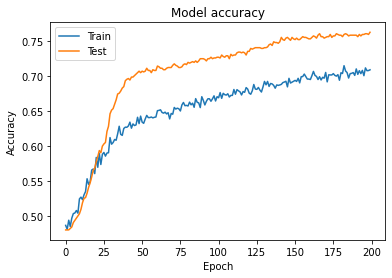

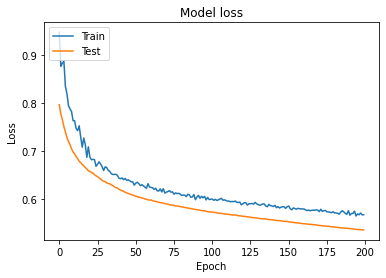

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [38]:
acc = accuracy_score(k2, k1)
f1 = f1_score(k2, test_pred[:,0])
y_score = model.predict_proba(X_b_shaped)
roc = roc_auc_score(k2, y_score)
print('The accuracy of this model is ' + str(acc))
print('The f1 score of this model is ' + str(f1))
print('The area under curve of this model is ' + str(roc))
print('The confusion matrix is as follows:')
print(confusion_matrix(y_b, test_pred[:,0]))

Instructions for updating:
Please use `model.predict()` instead.
The accuracy of this model is 0.7773109243697479
The f1 score of this model is 0.7499999999999999
The area under curve of this model is 0.8558854718981973
The confusion matrix is as follows:
[[211  35]
 [ 71 159]]


Text(0, 0.5, 'True Positive Rate')

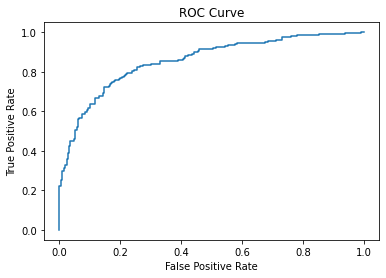

In [39]:
fpr, tpr,x = roc_curve( k2, y_score)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Testing on New files

In [0]:
import numpy as np
import math
import cv2

In [41]:
from scipy.spatial import distance
from mlxtend.image import extract_face_landmarks

In [0]:
def images(x):
    vc.set(cv2.CAP_PROP_POS_MSEC, x)
    result,image = vc.read()
    return result, image

In [0]:
path = '/content/drive/My Drive/Untitled folder/Video/'
filename = 'test5.mp4'

In [44]:
lm =[]
frames_max = 100 #number of frames needed per video
vc = cv2.VideoCapture(path + filename)
tim = 0
result, image  = images(tim)
count = 0
while result and count < frames_max: 
    landmarks = extract_face_landmarks(image)
    if sum(sum(landmarks)) != 0:
        lm.append(landmarks)
        tim +=600 
        result, image = images(tim)
        count += 1
        if count%10 == 0: print('Extracted face landmarks from '+str(count)+' frames')
    else:  
        tim += 600
        result, image = images(tim)
        print('Face not detected in this frame, till now extracted from '+str(count)+' frames')
lm = np.array(lm)

Extracted face landmarks from 10 frames
Extracted face landmarks from 20 frames
Extracted face landmarks from 30 frames
Extracted face landmarks from 40 frames
Extracted face landmarks from 50 frames
Extracted face landmarks from 60 frames
Extracted face landmarks from 70 frames
Extracted face landmarks from 80 frames
Extracted face landmarks from 90 frames
Extracted face landmarks from 100 frames


In [0]:
def EAR(arr):
	x1,x2,x3 = distance.euclidean(arr[1], arr[5]),distance.euclidean(arr[2], arr[4]),distance.euclidean(arr[0], arr[3])
	frac = (x1+ x2) / (2.0 * x3)
	return frac

def MAR(arr):
    x1,x2 = distance.euclidean(arr[14], arr[18]), distance.euclidean(arr[12], arr[16])
    frac = x1/x2
    return frac

def PUC(arr):
    r = distance.euclidean(arr[1], arr[4])/2.0
    area = math.pi*(r**2)
    peri = 0
    for i in range(0,5):
      peri = peri + distance.euclidean(arr[i], arr[i+1])
    peri = peri + distance.euclidean(arr[5], arr[0])
    return 4 * math.pi * area /(peri**2)

In [0]:
features = []
for l in lm:
  mainMarks = l[36:68]
  x1, x2, x3 = EAR(mainMarks), MAR(mainMarks), PUC(mainMarks)
  features.append([x1, x2, x3, x2/x1])
features = np.array(features)

In [0]:
np.savetxt("test5.csv", features, delimiter = ",")

In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('/content/test5.csv')

In [0]:
df.columns = ['x1','x2','x3','x4']

In [0]:
df_temp = df.iloc[0:3, :]
df_mean = df_temp.mean()
df_std = df_temp.std()
df["x1_norm"]=(df["x1"]-df_mean["x1"])/df_std["x1"]
df["x2_norm"]=(df["x2"]-df_mean["x2"])/df_std["x2"]
df["x3_norm"]=(df["x3"]-df_mean["x3"])/df_std["x3"]
df["x4_norm"]=(df["x4"]-df_mean["x4"])/df_std["x4"]

In [0]:
df

,x1,x2,x3,x4,x1_norm,x2_norm,x3_norm,x4_norm
0,0.291667,1.083643,0.435907,3.715348,-0.437047,1.082649,0.802088,1.068879
1,0.291414,0.998322,0.432466,3.425789,-0.707080,-0.193612,0.318324,-0.156122
2,0.293147,0.951831,0.422229,3.246939,1.144127,-0.889037,-1.120412,-0.912756
3,0.301421,0.953835,0.439747,3.164456,9.980405,-0.859071,1.341818,-1.261708
4,0.319744,0.936145,0.486723,2.927791,29.548271,-1.123684,7.944414,-2.262934
...,...,...,...,...,...,...,...,...
94,0.271163,0.915597,0.362746,3.376556,-22.333716,-1.431036,-9.481121,-0.364404
95,0.340021,0.982194,0.469012,2.888626,51.203017,-0.434856,5.455065,-2.428627
96,0.300000,0.973282,0.444708,3.244273,8.462478,-0.568174,2.039089,-0.924038
97,0.300000,0.939200,0.444708,3.130666,8.462478,-1.077985,2.039089,-1.404660


In [0]:
df = df.drop(["x1","x2","x3","x4"],axis=1)

In [0]:
df

,x1_norm,x2_norm,x3_norm,x4_norm
0,-0.437047,1.082649,0.802088,1.068879
1,-0.707080,-0.193612,0.318324,-0.156122
2,1.144127,-0.889037,-1.120412,-0.912756
3,9.980405,-0.859071,1.341818,-1.261708
4,29.548271,-1.123684,7.944414,-2.262934
...,...,...,...,...
94,-22.333716,-1.431036,-9.481121,-0.364404
95,51.203017,-0.434856,5.455065,-2.428627
96,8.462478,-0.568174,2.039089,-0.924038
97,8.462478,-1.077985,2.039089,-1.404660


In [0]:
df = np.expand_dims(df, axis=2)
tp = model.predict_classes(df)

In [0]:
tp = np.array(tp)

In [0]:
val = []
for i in range(len(tp)): val.append(tp[i][0])

# Output graph

Text(0.5, 1.0, 'label vs time')

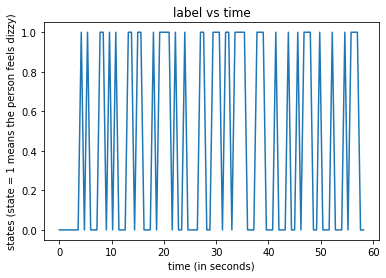

In [0]:
x = np.arange(0,(len(val)*0.6)-1,0.6)
plt.plot(x,val[:len(val)-1])
plt.xlabel('time (in seconds)')
plt.ylabel('states (state = 1 means the person feels dizzy)')
plt.title('label vs time')

# Generating JSON file

In [0]:
fin=[]
for i in range(len(val)):
  fin.append([str(i*0.6),str(val[i])])

In [0]:
dt = {}
dt['dizzy']=fin

In [0]:
import json

In [0]:
with open('test5.json', 'w') as f:
    json.dump(dt, f)

## Saving model



In [0]:
model.save_weights("model_weights.h5")

In [0]:
model.save('my_model.h5')